In [143]:
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
%pylab inline
import os
os.chdir('/root/proj_kaggle_salt')

Populating the interactive namespace from numpy and matplotlib


In [144]:
log_path = 'runs/debug/'
log_file = 'train_SE_ResNext50_finetune2_1.log'
sl =350
logs = pd.read_json(log_path+log_file, lines=True)

<Figure size 1872x2448 with 0 Axes>

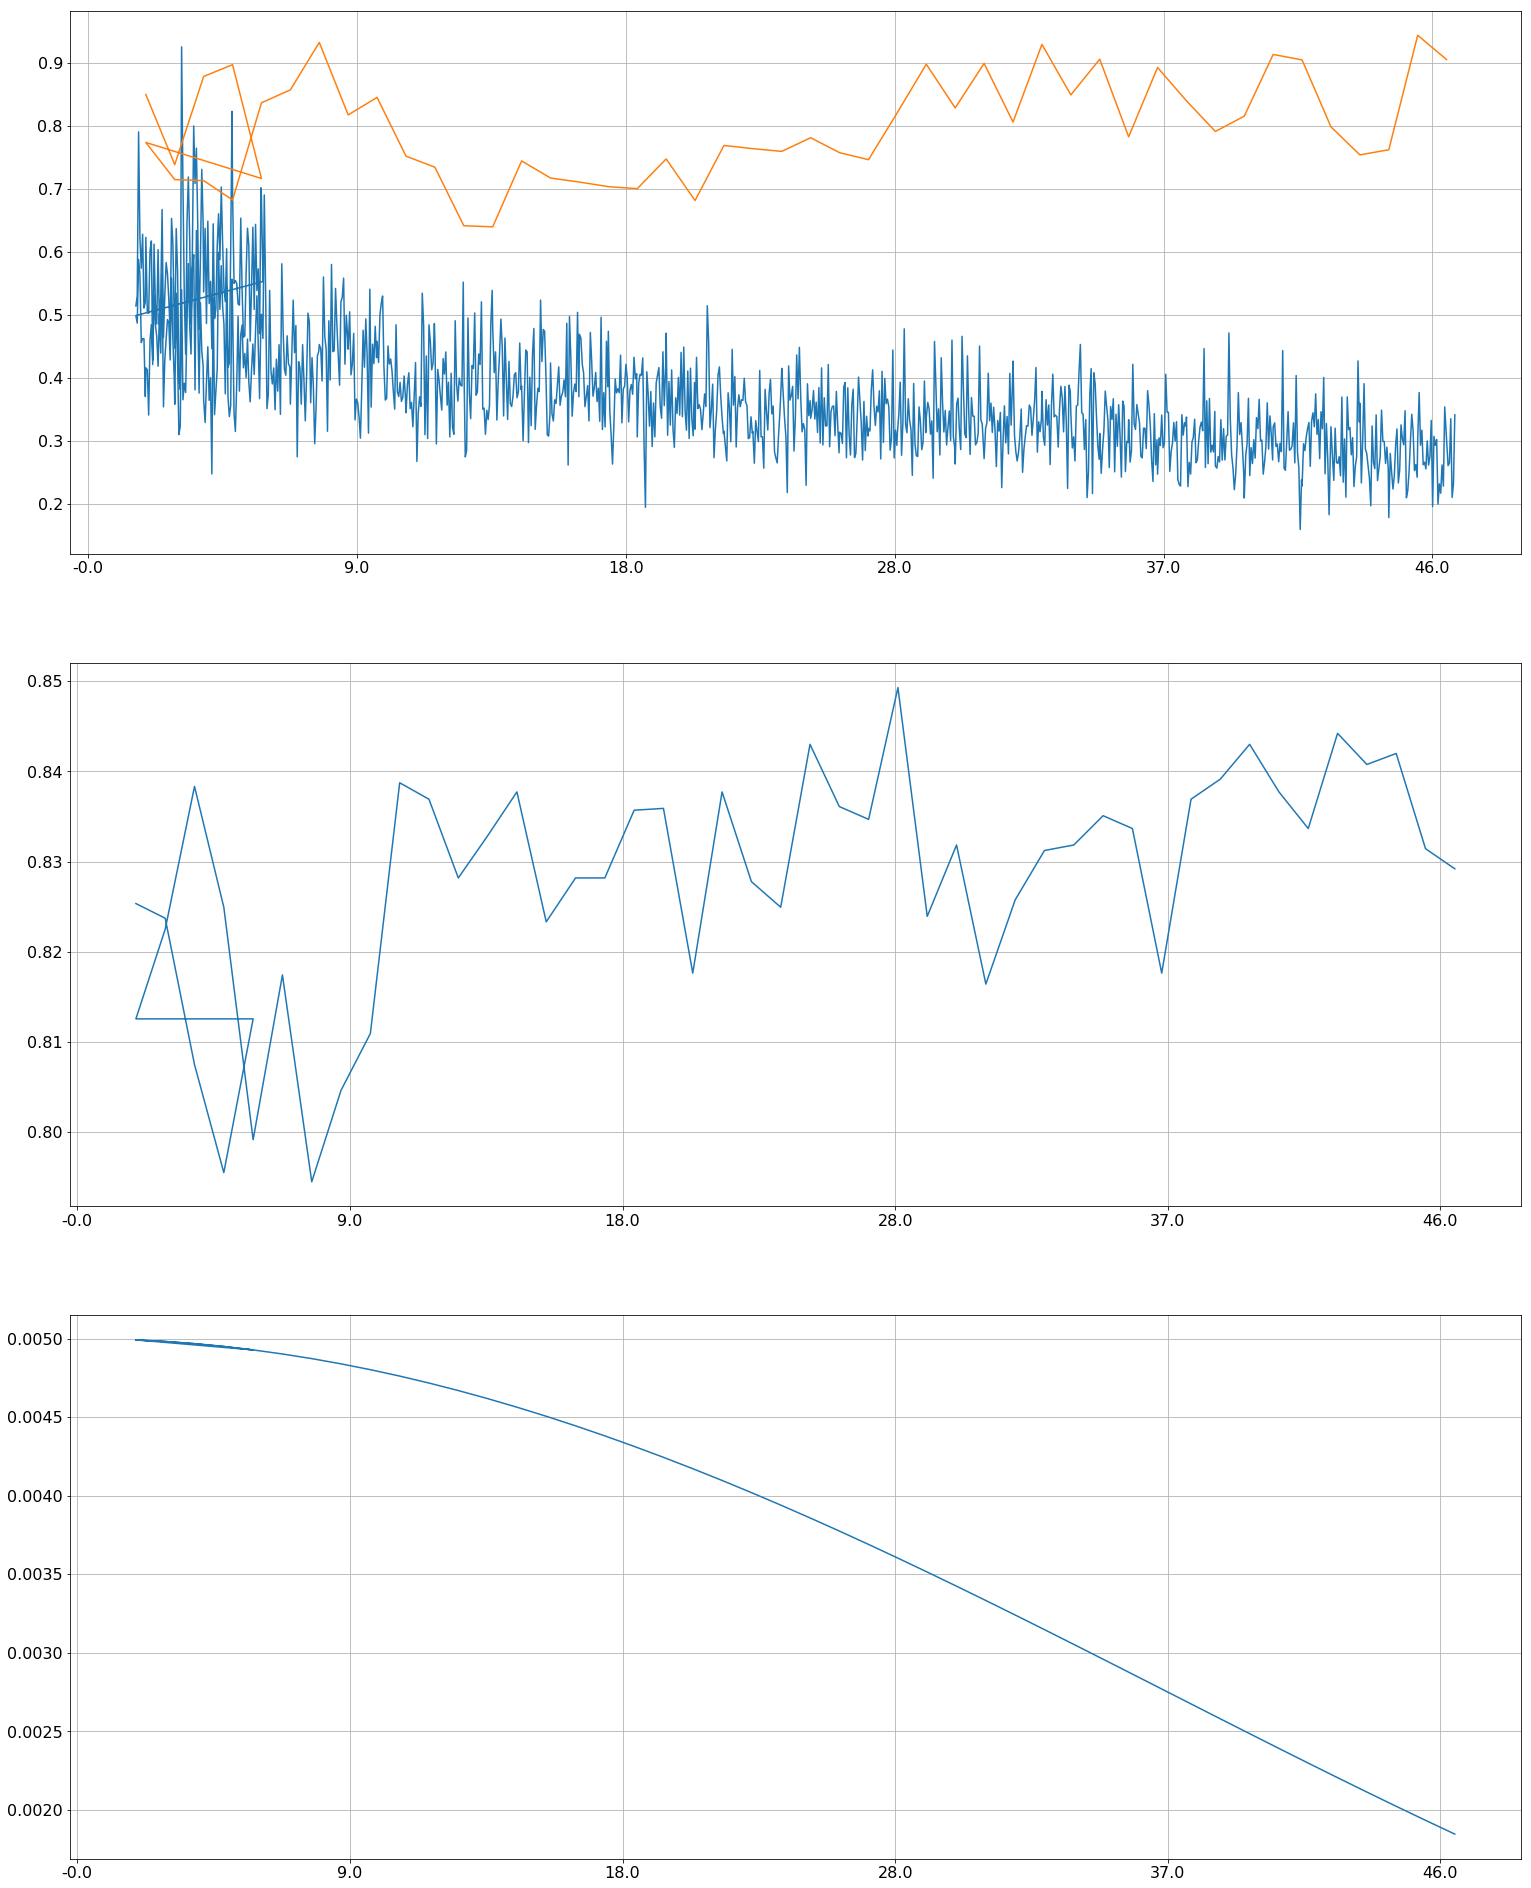

In [145]:
plt.figure(figsize=(26,34))
fig, ax = plt.subplots(3,1, sharex=False, figsize=(26,34))

for ax_ in ax:
    ax_.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,t: x // 214))
    
    for ticks in ax_.xaxis.get_major_ticks():
        ticks.label.set_fontsize(16) 
        
    for ticks in ax_.yaxis.get_major_ticks():
        ticks.label.set_fontsize(16) 
      
    #ax_.legend(loc='center left')
    ax_.grid(True)        

ax[0].plot(logs.step[(logs.loss.isna() == False) & (logs.step > sl)],
            logs.loss[(logs.loss.isna() == False) & (logs.step > sl)],
            label="training")
            
ax[0].plot(logs.step[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            logs.valid_loss[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            label = "validation")
         
            
#plt.plot(logs.step[(logs.valid_loss.isna() == False) & (logs.step > sl)],
#            logs.jaccard[(logs.valid_loss.isna() == False) & (logs.step > sl)],
#            label = "jaccard")

ax[1].plot(logs.step[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            logs.mean_iou2[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            label = "Mean IOU")
         

ax[2].plot(logs.step[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            logs.lr[(logs.valid_loss.isna() == False) & (logs.step > sl)],
            label = "LR")



In [146]:
logs.mean_iou2.max()

0.849290060851926